In [1]:
# inizialize
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt


In [2]:
# create matrix and vector
n = 4
A = np.random.randn(n, n)
x_true = np.ones((n, ))  
print(A)
print(x_true)
print()


[[-1.60954149  2.29104797 -0.18894839  1.22714974]
 [ 0.48333428 -1.82609876  0.10684571 -0.65731003]
 [ 0.17211891 -0.71813888 -1.60041226  0.83213781]
 [ 0.64047987 -0.88285371  1.74955975  0.71330064]]
[1. 1. 1. 1.]



In [3]:
# create y frome true x
y = A @ x_true
print(y)


[ 1.71970783 -1.8932288  -1.31429441  2.22048655]


In [4]:
# finding x form y = A
x_find = np.linalg.solve(A, y)
print(x_find)
print(x_true)

[1. 1. 1. 1.]
[1. 1. 1. 1.]


In [5]:
# condition number
Ai = np.linalg.inv(A)
k2 = (np.linalg.norm(A, 2))*(np.linalg.norm(Ai, 2))
kinf = (np.linalg.norm(A, math.inf))*(np.linalg.norm(Ai, math.inf))

k2a = np.linalg.cond(A, 2)
kinfa = np.linalg.cond(A, math.inf)
print(k2, kinf, '\n', k2a, kinfa)

6.961448064641322 13.918873342645435 
 6.961448064641314 13.918873342645435


In [6]:
# finding errors
Er = (np.linalg.norm(x_true - x_find, 2))/ np.linalg.norm(x_true, 2) # maybe inverted
print(f"Relative error: {Er}")

Relative error: 2.7755575615628914e-16


N: 10, Error: 3.475547814546182e-16, k2: 31.67689067753687, kinf: 66.0803462824753
N: 20, Error: 4.44332004765608e-15, k2: 60.82602570859656, kinf: 225.00940712510572
N: 30, Error: 6.620473788278877e-15, k2: 99.52848543748856, kinf: 625.834217336615
N: 40, Error: 2.2889180296191223e-15, k2: 42.28577511030424, kinf: 405.3752042758687
N: 50, Error: 4.088335048333973e-15, k2: 117.27731929304345, kinf: 886.8270159481713
N: 60, Error: 5.427560053261959e-15, k2: 92.16451872287276, kinf: 782.607448343585
N: 70, Error: 1.6074201192551243e-14, k2: 409.7399486144809, kinf: 3629.280711898522
N: 80, Error: 6.414949433418427e-15, k2: 110.12157120482225, kinf: 1188.912151161118
N: 90, Error: 8.830991667610108e-14, k2: 8966.606929152638, kinf: 84867.08455061047
N: 100, Error: 9.541176836451518e-15, k2: 339.1058357545273, kinf: 5258.531032363188


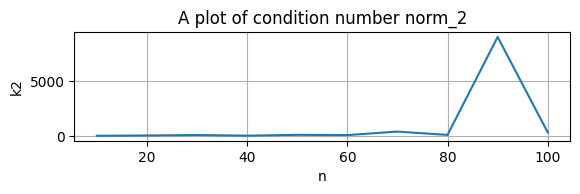

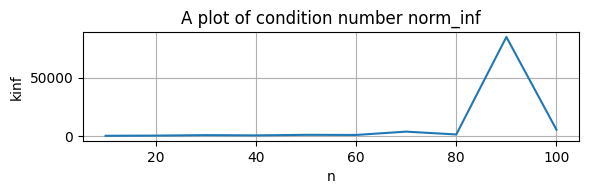

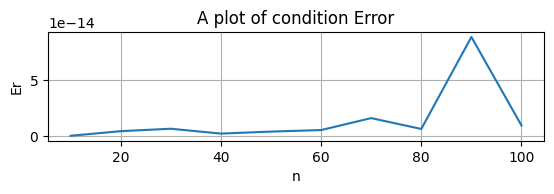

[3.475547814546182e-16, 4.44332004765608e-15, 6.620473788278877e-15, 2.2889180296191223e-15, 4.088335048333973e-15, 5.427560053261959e-15, 1.6074201192551243e-14, 6.414949433418427e-15, 8.830991667610108e-14, 9.541176836451518e-15]


In [7]:
k2 = []
kinf = []
Er = []
n_v = np.arange(10,101,10)
l = len(n_v)

for i in n_v:
    # create matrix and vector
    n = i
    A = np.random.randn(n, n)
    x_true = np.ones((n, ))  

    # find the solution
    y = A @ x_true
    x_find = np.linalg.solve(A, y)

    # condition number
    Ai = np.linalg.inv(A)
    k2_m = (np.linalg.norm(A, 2))*(np.linalg.norm(Ai, 2))
    kinf_m = (np.linalg.norm(A, math.inf))*(np.linalg.norm(Ai, math.inf))

    # finding errors
    Er_m = (np.linalg.norm(x_find - x_true, 2))/ np.linalg.norm(x_true, 2)


    Er.append(Er_m)
    k2.append(k2_m)
    kinf.append(kinf_m)
    print(f"N: {n}, Error: {Er_m}, k2: {k2_m}, kinf: {kinf_m}")

# plot
plt.subplot(311)
#x_axe = np.arange(1,l,1)
x_axe = n_v
y_axe = k2
plt.plot(x_axe,y_axe)
plt.title('A plot of condition number norm_2')
plt.xlabel('n')
plt.ylabel('k2')
plt.grid()
plt.show()

plt.subplot(312)
x_axe = n_v
y_axe = kinf
plt.plot(x_axe,y_axe)
plt.title('A plot of condition number norm_inf')
plt.xlabel('n')
plt.ylabel('kinf')
plt.grid()
plt.show()

plt.subplot(313)
x_axe = n_v
y_axe = Er
plt.plot(x_axe,y_axe)
plt.title('A plot of condition Error')
plt.xlabel('n')
plt.ylabel('Er')
plt.grid()
plt.show()

print(Er)



[5, 10, 15, 20, 25, 30]
N: 5, Error: 1.6504516023497825e-14, k2: 26169.687970633677, kinf: 43736.000000000524
N: 10, Error: 8.960197425047259e-08, k2: 2106257537106.8862, kinf: 3306440916902.2573
N: 15, Error: 62878173.40150342, k2: 380713448532.20526, kinf: 901862085553.4888
N: 20, Error: 273912467.99829614, k2: 352859532199.56537, kinf: 1891189759684.322
N: 25, Error: 60533129.58785457, k2: 60083544775.281166, kinf: 328971700760.8172
N: 30, Error: 41218735.76798882, k2: 68821163118.93849, kinf: 567368832099.911


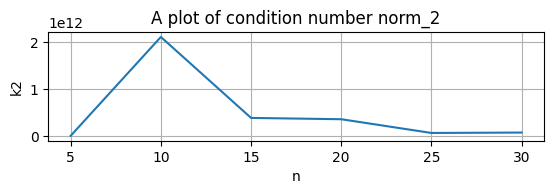

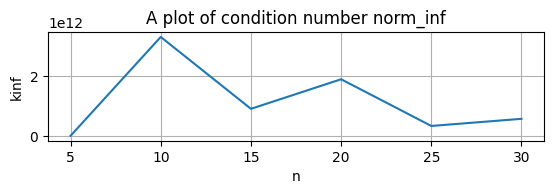

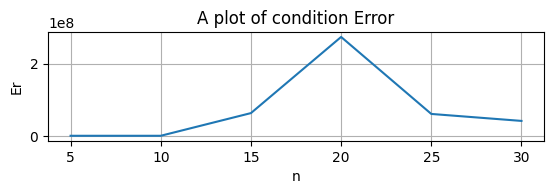

In [8]:
k2v = []
kinfv = []
Erv = []
n_v = [5,10,15,20,25,30]
l = len(n_v)
print(n_v)

for i in n_v:
    # create matrix and vector
    n = i
    x = np.arange(1, n+1)
    A = np.vander(x)
    x_true = np.ones((n, ))  

    # find the solution
    y = A @ x
    x_find = np.linalg.solve(A, y)

    # condition number
    Ai = np.linalg.inv(A)
    k2_m = (np.linalg.norm(A, 2))*(np.linalg.norm(Ai, 2))
    kinf_m = (np.linalg.norm(A, math.inf))*(np.linalg.norm(Ai, math.inf))

    # finding errors
    Er_m = (np.linalg.norm(x_find - x, 2))/ np.linalg.norm(x, 2)


    Erv.append(Er_m)
    k2v.append(k2_m)
    kinfv.append(kinf_m)
    print(f"N: {n}, Error: {Er_m}, k2: {k2_m}, kinf: {kinf_m}")

# plot
plt.subplot(311)
#x_axe = np.arange(1,l,1)
x_axe = n_v
y_axe = k2v
plt.plot(x_axe,y_axe)
plt.title('A plot of condition number norm_2')
plt.xlabel('n')
plt.ylabel('k2')
plt.grid()
plt.show()
plt.subplot(312)
x_axe = n_v
y_axe = kinfv
plt.plot(x_axe,y_axe)
plt.title('A plot of condition number norm_inf')
plt.xlabel('n')
plt.ylabel('kinf')
plt.grid()
plt.show()
plt.subplot(313)
x_axe = n_v
y_axe = Erv
plt.plot(x_axe,y_axe)
plt.title('A plot of condition Error')
plt.xlabel('n')
plt.ylabel('Er')
plt.grid()
plt.show()




N: 4, Error: 4.137409622430382e-14, k2: 15513.738738933602, kinf: 28375.00000000183
N: 5, Error: 1.6828426299227195e-12, k2: 476607.2502457645, kinf: 943656.0000063627
N: 6, Error: 1.4242437208427487e-10, k2: 14951058.642074954, kinf: 29070279.00379062
N: 7, Error: 7.637452450980383e-09, k2: 475367356.4677417, kinf: 985194889.577766
N: 8, Error: 6.124089555723088e-08, k2: 15257576321.957924, kinf: 33872792385.924484
N: 9, Error: 3.8751634185032475e-06, k2: 493153786012.41656, kinf: 1099651994744.017
N: 10, Error: 8.67039023709691e-05, k2: 16026019477413.041, kinf: 35356847610517.12
N: 11, Error: 0.0008383287776275721, k2: 523420656648738.06, kinf: 1234532816741620.0
N: 12, Error: 0.3249129296869168, k2: 1.7715806936210974e+16, kinf: 4.255399301891292e+16


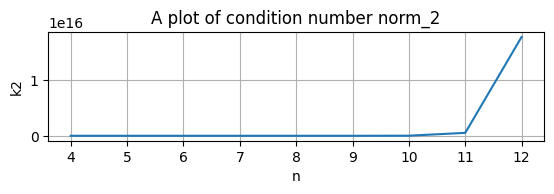

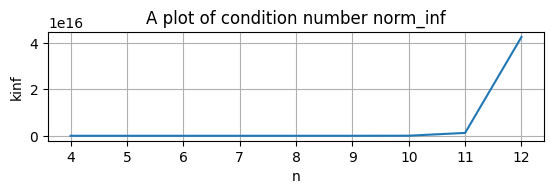

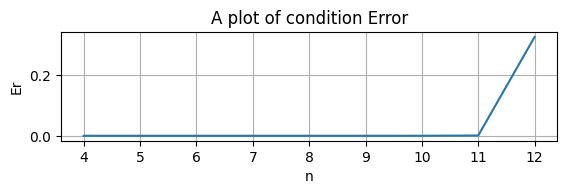

[3.475547814546182e-16, 4.44332004765608e-15, 6.620473788278877e-15, 2.2889180296191223e-15, 4.088335048333973e-15, 5.427560053261959e-15, 1.6074201192551243e-14, 6.414949433418427e-15, 8.830991667610108e-14, 9.541176836451518e-15]


In [9]:
k2h = []
kinfh = []
Erh = []
n_v = np.arange(4,13,1)
l = len(n_v)

for i in n_v:
    # create matrix and vector
    n = i
    A = sc.linalg.hilbert(n)
    x_true = np.ones((n, ))  

    # find the solution
    y = A @ x_true
    x_find = np.linalg.solve(A, y)

    # condition number
    Ai = np.linalg.inv(A)
    k2_m = (np.linalg.norm(A, 2))*(np.linalg.norm(Ai, 2))
    kinf_m = (np.linalg.norm(A, math.inf))*(np.linalg.norm(Ai, math.inf))

    # finding errors
    Er_m = (np.linalg.norm(x_find - x_true, 2))/ np.linalg.norm(x_true, 2)


    Erh.append(Er_m)
    k2h.append(k2_m)
    kinfh.append(kinf_m)
    print(f"N: {n}, Error: {Er_m}, k2: {k2_m}, kinf: {kinf_m}")

# plot
plt.subplot(311)
#x_axe = np.arange(1,l,1)
x_axe = n_v
y_axe = k2h
plt.plot(x_axe,y_axe)
plt.title('A plot of condition number norm_2')
plt.xlabel('n')
plt.ylabel('k2')
plt.grid()
plt.show()

plt.subplot(312)
x_axe = n_v
y_axe = kinfh
plt.plot(x_axe,y_axe)
plt.title('A plot of condition number norm_inf')
plt.xlabel('n')
plt.ylabel('kinf')
plt.grid()
plt.show()

plt.subplot(313)
x_axe = n_v
y_axe = Erh
plt.plot(x_axe,y_axe)
plt.title('A plot of condition Error')
plt.xlabel('n')
plt.ylabel('Er')
plt.grid()
plt.show()

print(Er)



In [10]:
eps = 1
while (1.0 + eps) != 1.0:
    eps /= 2

print(f'Machine Epsilon: {eps}')

# solution found from the web
import sys
machine_eps = sys.float_info.epsilon
print(f'Real Machine Epsilon: {machine_eps}')

Machine Epsilon: 1.1102230246251565e-16
Real Machine Epsilon: 2.220446049250313e-16


0.5772156649015329 10000


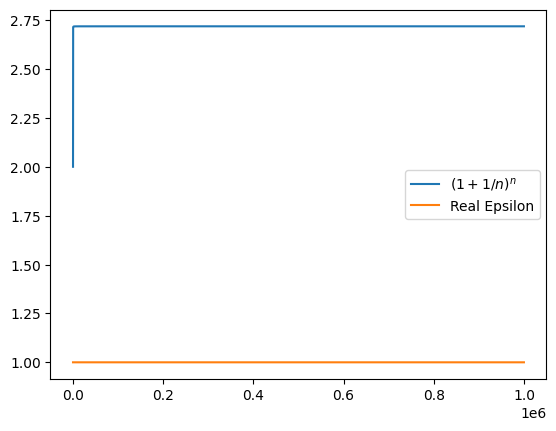

In [11]:
n = np.arange(1,1000000,100)
e = 0.57721566490153286060651209008240243104215933593992
E = np.ones((len(n)))
print(e,len(n))
An = []
for i in n:
    a = (1 + 1/i)**i
    An.append(a)

plt.figure()
plt.plot(n,An, label='$(1 + 1/n)^n$')
plt.plot(n,E,label='Real Epsilon')
plt.legend()
plt.show()

come mai il valore si allontana? sicuramente a causa di errori in virgola mobile

In [12]:
A = np.array([[4,2],[1,3]])
B = np.array([[4,2],[2,1]])
rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
eigval_A, eigvec_A = np.linalg.eig(A)
eigval_B, eigvec_B = np.linalg.eig(B)
print('rank egienvalues and eigenvectors\n', rank_A, rank_B, '\n', eigval_A, eigval_B, '\n', eigvec_A, eigvec_B)

rank egienvalues and eigenvectors
 2 1 
 [5. 2.] [5. 0.] 
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]] [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


The first matrix as we can see has rank 2 infact the matrix is non-singular. We can say that also because the autovalue are both not zero.
In the second case is the opposite, the rank is not 2 (min bethween row and columns) so is not full-rank. For this reason is not invertible and we can see that there is one eigenvalue that is 0